In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-08-01,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,2020-08-01,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,2020-08-01,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,2020-08-01,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,2020-08-01,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,2020-08-01,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 250.0+ KB


In [5]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [6]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


**EXPLORATORY DATA ANALYSIS**

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

array([[<AxesSubplot:xlabel='impressions', ylabel='impressions'>,
        <AxesSubplot:xlabel='clicks', ylabel='impressions'>,
        <AxesSubplot:xlabel='cost', ylabel='impressions'>,
        <AxesSubplot:xlabel='conversions', ylabel='impressions'>,
        <AxesSubplot:xlabel='revenue', ylabel='impressions'>],
       [<AxesSubplot:xlabel='impressions', ylabel='clicks'>,
        <AxesSubplot:xlabel='clicks', ylabel='clicks'>,
        <AxesSubplot:xlabel='cost', ylabel='clicks'>,
        <AxesSubplot:xlabel='conversions', ylabel='clicks'>,
        <AxesSubplot:xlabel='revenue', ylabel='clicks'>],
       [<AxesSubplot:xlabel='impressions', ylabel='cost'>,
        <AxesSubplot:xlabel='clicks', ylabel='cost'>,
        <AxesSubplot:xlabel='cost', ylabel='cost'>,
        <AxesSubplot:xlabel='conversions', ylabel='cost'>,
        <AxesSubplot:xlabel='revenue', ylabel='cost'>],
       [<AxesSubplot:xlabel='impressions', ylabel='conversions'>,
        <AxesSubplot:xlabel='clicks', ylabel='con

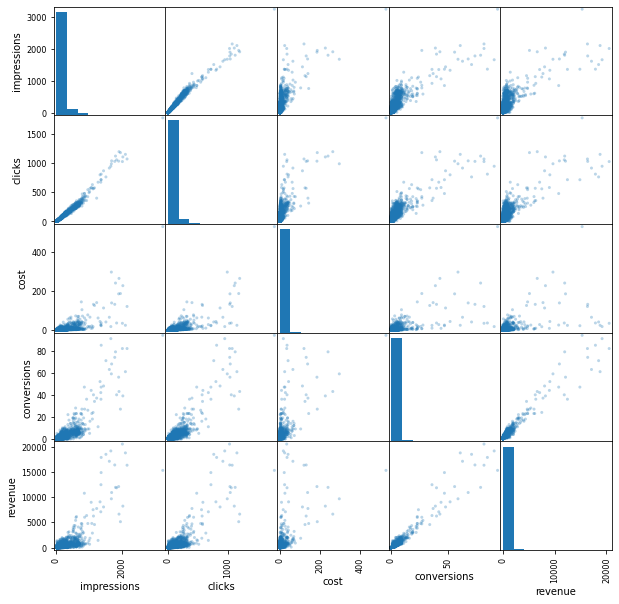

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['impressions', 'clicks','cost', 'conversions','revenue']],
    alpha=0.3, figsize=(10,10))

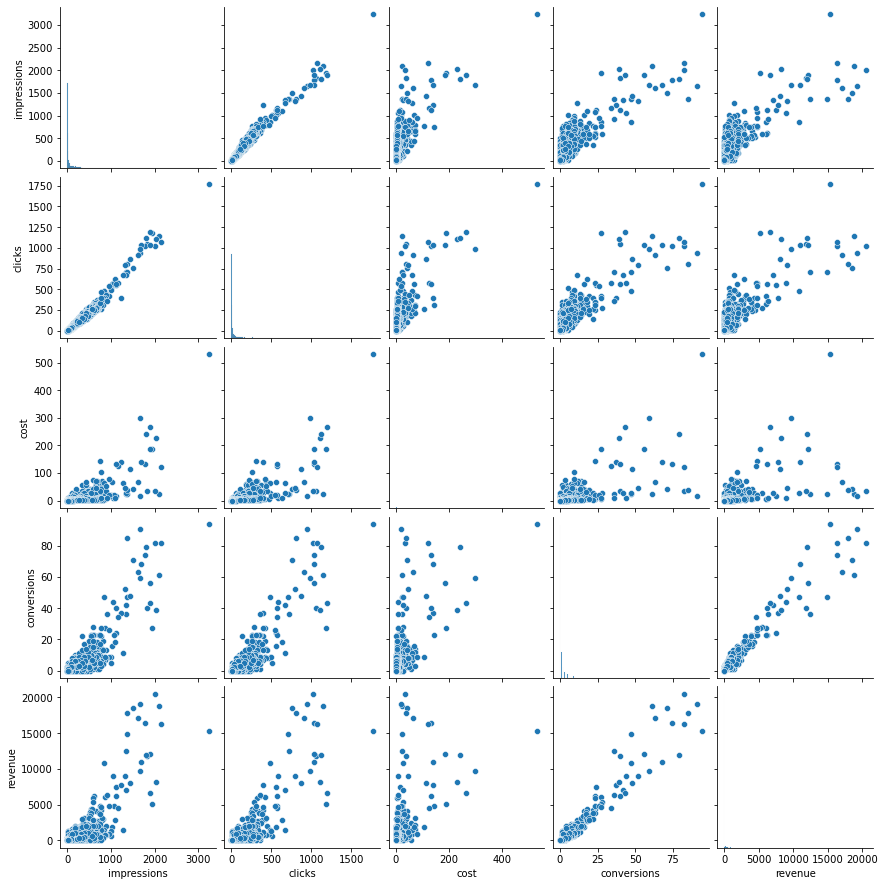

In [8]:
sns.pairplot(df)

In [9]:
df_corr = df.corr()
index = df_corr.index

<AxesSubplot:>

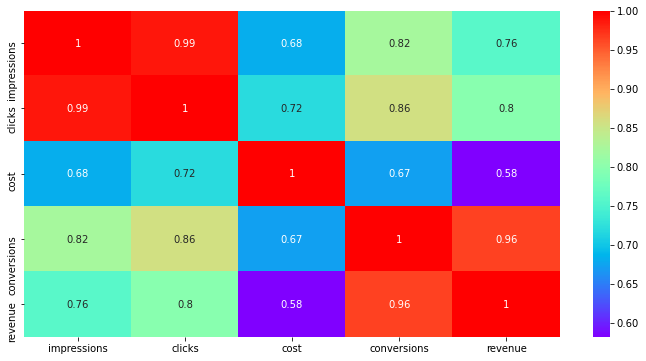

In [10]:

plt.figure(figsize = (12,6))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow')

In [11]:
threshold = .52

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

correlation(df,threshold)

{'clicks', 'conversions', 'cost', 'revenue'}

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


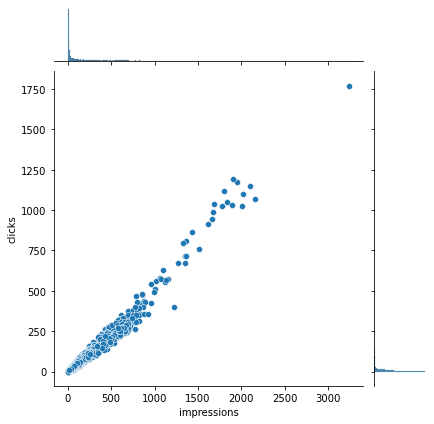

In [12]:
sns.jointplot(df['impressions' ],df['clicks'])

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


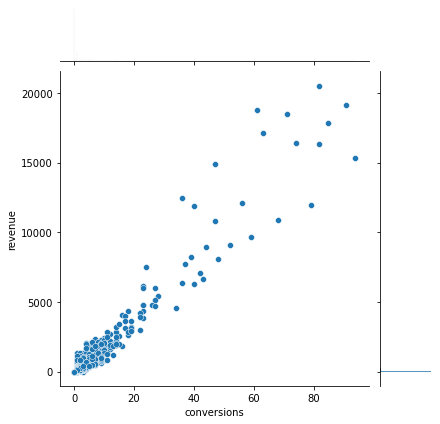

In [13]:
sns.jointplot(df['conversions' ],df['revenue'])

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


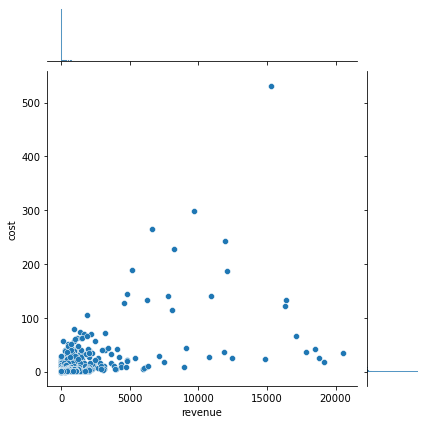

In [14]:
sns.jointplot(df['revenue' ],df['cost'])

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adgroup', ylabel='count'>

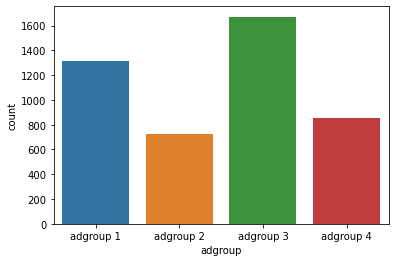

In [15]:
sns.countplot('adgroup',data=df)

<AxesSubplot:xlabel='ad', ylabel='count'>

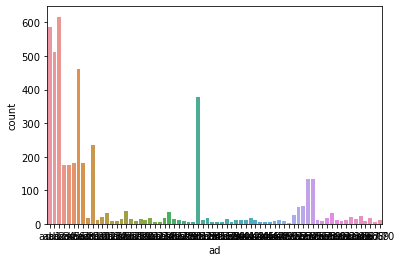

In [16]:
sns.countplot(x='ad', data=df)



<AxesSubplot:xlabel='impressions', ylabel='clicks'>

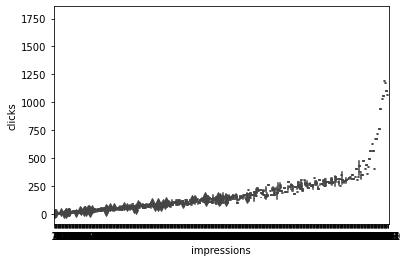

In [17]:
sns.boxplot(y='clicks',x='impressions',data=df)

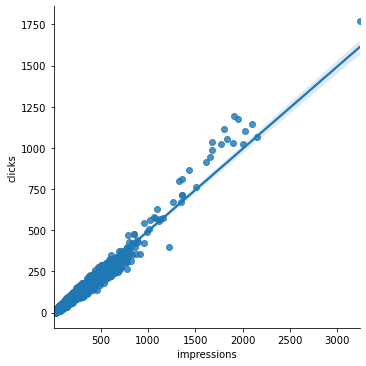

In [18]:
sns.lmplot(x='impressions',y ='clicks', data=df)

**FEATURE ENGINEERING**

In [19]:
df['date'] = pd.to_datetime(df['date'])

df['Month'] = df['date'].dt.month
df['Day of the month'] = df['date'].dt.day
df["Day of the week"] = df['date'].dt.dayofweek
df['Hour'] = df['date'].dt.hour
df = df.drop(['date'], axis=1)

df.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour
0,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,8,1,5,0
1,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,8,1,5,0
2,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,8,1,5,0
3,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,8,1,5,0
4,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,8,1,5,0


In [20]:
df.tail()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour
4566,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.0,2,28,6,0
4567,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.0,2,28,6,0
4568,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.2,2,28,6,0
4569,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.0,2,28,6,0
4570,campaign 1,adgroup 1,ad 55,19,10,0.14,0,0.0,2,28,6,0


In [21]:
dummies=pd.get_dummies(df.adgroup)
dummies

,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
4566,0,0,1,0
4567,0,0,0,1
4568,0,0,1,0
4569,1,0,0,0


In [22]:
merged=pd.concat([df,dummies],axis='columns')
merged

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,8,1,5,0,1,0,0,0
1,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,8,1,5,0,0,1,0,0
2,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,8,1,5,0,0,0,1,0
3,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,8,1,5,0,0,0,0,1
4,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,8,1,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00,2,28,6,0,0,0,1,0
4567,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00,2,28,6,0,0,0,0,1
4568,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20,2,28,6,0,0,0,1,0
4569,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00,2,28,6,0,1,0,0,0


In [23]:
final=merged.drop(['adgroup','adgroup 4','campaign'],axis='columns')
final

,ad,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,adgroup 1,adgroup 2,adgroup 3
0,ad 1,24,6,0.08,0,0.00,8,1,5,0,1,0,0
1,ad 1,1,0,0.00,0,0.00,8,1,5,0,0,1,0
2,ad 1,13,4,0.04,0,0.00,8,1,5,0,0,0,1
3,ad 1,5,4,0.08,0,0.00,8,1,5,0,0,0,0
4,ad 2,247,126,1.29,4,925.71,8,1,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,ad 55,19,6,0.07,0,0.00,2,28,6,0,0,0,1
4567,ad 55,1,0,0.00,0,0.00,2,28,6,0,0,0,0
4568,ad 56,16,8,0.12,1,93.20,2,28,6,0,0,0,1
4569,ad 56,37,13,0.23,0,0.00,2,28,6,0,1,0,0


In [24]:
df['ad'].unique()

array(['ad 1', 'ad 2', 'ad 3', 'ad 4', 'ad 5', 'ad 6', 'ad 7', 'ad 8',
       'ad 9', 'ad 10', 'ad 11', 'ad 12', 'ad 13', 'ad 14', 'ad 15',
       'ad 16', 'ad 17', 'ad 18', 'ad 19', 'ad 20', 'ad 21', 'ad 22',
       'ad 23', 'ad 24', 'ad 25', 'ad 26', 'ad 27', 'ad 28', 'ad 29',
       'ad 30', 'ad 31', 'ad 32', 'ad 33', 'ad 34', 'ad 35', 'ad 36',
       'ad 37', 'ad 38', 'ad 39', 'ad 40', 'ad 41', 'ad 42', 'ad 43',
       'ad 44', 'ad 45', 'ad 46', 'ad 47', 'ad 48', 'ad 49', 'ad 50',
       'ad 51', 'ad 52', 'ad 53', 'ad 54', 'ad 55', 'ad 56', 'ad 57',
       'ad 58', 'ad 59', 'ad 60', 'ad 61', 'ad 62', 'ad 63', 'ad 64',
       'ad 65', 'ad 66', 'ad 67', 'ad 68', 'ad 69', 'ad 70'], dtype=object)

In [25]:
df.ad.value_counts().to_dict()

{'ad 3': 617,
 'ad 1': 587,
 'ad 2': 512,
 'ad 7': 461,
 'ad 32': 377,
 'ad 10': 235,
 'ad 8': 180,
 'ad 6': 180,
 'ad 5': 174,
 'ad 4': 174,
 'ad 55': 134,
 'ad 56': 133,
 'ad 54': 54,
 'ad 53': 51,
 'ad 17': 37,
 'ad 26': 35,
 'ad 60': 33,
 'ad 13': 32,
 'ad 52': 25,
 'ad 66': 23,
 'ad 12': 21,
 'ad 64': 19,
 'ad 43': 18,
 'ad 22': 18,
 'ad 68': 18,
 'ad 25': 18,
 'ad 34': 17,
 'ad 9': 16,
 'ad 59': 16,
 'ad 27': 15,
 'ad 38': 14,
 'ad 16': 14,
 'ad 18': 14,
 'ad 65': 13,
 'ad 20': 13,
 'ad 63': 12,
 'ad 42': 12,
 'ad 11': 12,
 'ad 40': 12,
 'ad 57': 12,
 'ad 28': 12,
 'ad 33': 11,
 'ad 41': 11,
 'ad 61': 11,
 'ad 70': 10,
 'ad 44': 10,
 'ad 49': 10,
 'ad 21': 10,
 'ad 19': 9,
 'ad 15': 8,
 'ad 14': 8,
 'ad 48': 8,
 'ad 67': 7,
 'ad 29': 7,
 'ad 50': 7,
 'ad 62': 7,
 'ad 58': 7,
 'ad 35': 6,
 'ad 46': 6,
 'ad 30': 6,
 'ad 45': 5,
 'ad 23': 5,
 'ad 37': 5,
 'ad 39': 4,
 'ad 24': 4,
 'ad 36': 4,
 'ad 47': 4,
 'ad 31': 4,
 'ad 69': 4,
 'ad 51': 3}

In [28]:
data=final['ad']

In [29]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['ad'],return_df=True)

In [30]:
#Fit and Transform Data 
df_encoded=encoder.fit_transform(data) 
df_encoded

,ad_0,ad_1,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4566,0,0,1,1,0,1,1,1
4567,0,0,1,1,0,1,1,1
4568,0,0,1,1,1,0,0,0
4569,0,0,1,1,1,0,0,0


In [31]:

df_encoded.head()

,ad_0,ad_1,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0


In [32]:
df_train=pd.concat([final,df_encoded],axis='columns')
df_train

,ad,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,...,adgroup 2,adgroup 3,ad_0,ad_1,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7
0,ad 1,24,6,0.08,0,0.00,8,1,5,0,...,0,0,0,0,0,0,0,0,0,1
1,ad 1,1,0,0.00,0,0.00,8,1,5,0,...,1,0,0,0,0,0,0,0,0,1
2,ad 1,13,4,0.04,0,0.00,8,1,5,0,...,0,1,0,0,0,0,0,0,0,1
3,ad 1,5,4,0.08,0,0.00,8,1,5,0,...,0,0,0,0,0,0,0,0,0,1
4,ad 2,247,126,1.29,4,925.71,8,1,5,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,ad 55,19,6,0.07,0,0.00,2,28,6,0,...,0,1,0,0,1,1,0,1,1,1
4567,ad 55,1,0,0.00,0,0.00,2,28,6,0,...,0,0,0,0,1,1,0,1,1,1
4568,ad 56,16,8,0.12,1,93.20,2,28,6,0,...,0,1,0,0,1,1,1,0,0,0
4569,ad 56,37,13,0.23,0,0.00,2,28,6,0,...,0,0,0,0,1,1,1,0,0,0


In [33]:

df_train=df_train.drop(['ad'],axis='columns')
df_train

,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,adgroup 1,adgroup 2,adgroup 3,ad_0,ad_1,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7
0,24,6,0.08,0,0.00,8,1,5,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0.00,0,0.00,8,1,5,0,0,1,0,0,0,0,0,0,0,0,1
2,13,4,0.04,0,0.00,8,1,5,0,0,0,1,0,0,0,0,0,0,0,1
3,5,4,0.08,0,0.00,8,1,5,0,0,0,0,0,0,0,0,0,0,0,1
4,247,126,1.29,4,925.71,8,1,5,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,2,28,6,0,0,0,1,0,0,1,1,0,1,1,1
4567,1,0,0.00,0,0.00,2,28,6,0,0,0,0,0,0,1,1,0,1,1,1
4568,16,8,0.12,1,93.20,2,28,6,0,0,0,1,0,0,1,1,1,0,0,0
4569,37,13,0.23,0,0.00,2,28,6,0,1,0,0,0,0,1,1,1,0,0,0


In [38]:
#Efficiency metrics
df_train['CTR'] = df_train['clicks'] / df_train['impressions'] * 100
df_train['CPC'] = df_train['cost'] / df_train['clicks'] * 100
df_train['CPA'] = df_train['cost'] / df_train['conversions'] * 100
df_train['ROI'] = df_train['revenue'] / df_train['cost'] * 100


In [39]:
df_train


,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,adgroup 1,...,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7,CTR,CPC,CPA,ROI
0,24,6,0.08,0,0.00,8,1,5,0,1,...,0,0,0,0,0,1,25.000000,1.333333,inf,0.000000
1,1,0,0.00,0,0.00,8,1,5,0,0,...,0,0,0,0,0,1,0.000000,NaN,NaN,NaN
2,13,4,0.04,0,0.00,8,1,5,0,0,...,0,0,0,0,0,1,30.769231,1.000000,inf,0.000000
3,5,4,0.08,0,0.00,8,1,5,0,0,...,0,0,0,0,0,1,80.000000,2.000000,inf,0.000000
4,247,126,1.29,4,925.71,8,1,5,0,1,...,0,0,0,0,1,0,51.012146,1.023810,32.25,71760.465116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,2,28,6,0,0,...,1,1,0,1,1,1,31.578947,1.166667,inf,0.000000
4567,1,0,0.00,0,0.00,2,28,6,0,0,...,1,1,0,1,1,1,0.000000,NaN,NaN,NaN
4568,16,8,0.12,1,93.20,2,28,6,0,0,...,1,1,1,0,0,0,50.000000,1.500000,12.00,77666.666667
4569,37,13,0.23,0,0.00,2,28,6,0,1,...,1,1,1,0,0,0,35.135135,1.769231,inf,0.000000


In [40]:
df_train.isnull().sum()

impressions           0
clicks                0
cost                  0
conversions           0
revenue               0
Month                 0
Day of the month      0
Day of the week       0
Hour                  0
adgroup 1             0
adgroup 2             0
adgroup 3             0
ad_0                  0
ad_1                  0
ad_2                  0
ad_3                  0
ad_4                  0
ad_5                  0
ad_6                  0
ad_7                  0
CTR                   0
CPC                 444
CPA                 444
ROI                 444
dtype: int64

In [43]:
df_null = df_train.columns[df_train.isnull().any()]

In [47]:
df_train.dropna(subset=['CPC','CPA','ROI'], axis=0, inplace=True)

In [49]:
df_train.isnull().sum()

impressions         0
clicks              0
cost                0
conversions         0
revenue             0
Month               0
Day of the month    0
Day of the week     0
Hour                0
adgroup 1           0
adgroup 2           0
adgroup 3           0
ad_0                0
ad_1                0
ad_2                0
ad_3                0
ad_4                0
ad_5                0
ad_6                0
ad_7                0
CTR                 0
CPC                 0
CPA                 0
ROI                 0
dtype: int64

In [51]:
df_train

,impressions,clicks,cost,conversions,revenue,Month,Day of the month,Day of the week,Hour,adgroup 1,...,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7,CTR,CPC,CPA,ROI
0,24,6,0.08,0,0.00,8,1,5,0,1,...,0,0,0,0,0,1,25.000000,1.333333,inf,0.000000
2,13,4,0.04,0,0.00,8,1,5,0,0,...,0,0,0,0,0,1,30.769231,1.000000,inf,0.000000
3,5,4,0.08,0,0.00,8,1,5,0,0,...,0,0,0,0,0,1,80.000000,2.000000,inf,0.000000
4,247,126,1.29,4,925.71,8,1,5,0,1,...,0,0,0,0,1,0,51.012146,1.023810,32.25,71760.465116
5,7,2,0.04,0,0.00,8,1,5,0,0,...,0,0,0,0,1,0,28.571429,2.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,10,2,0.02,0,0.00,2,28,6,0,1,...,0,0,1,0,1,0,20.000000,1.000000,inf,0.000000
4566,19,6,0.07,0,0.00,2,28,6,0,0,...,1,1,0,1,1,1,31.578947,1.166667,inf,0.000000
4568,16,8,0.12,1,93.20,2,28,6,0,0,...,1,1,1,0,0,0,50.000000,1.500000,12.00,77666.666667
4569,37,13,0.23,0,0.00,2,28,6,0,1,...,1,1,1,0,0,0,35.135135,1.769231,inf,0.000000


In [50]:
df_test=pd.read_csv('predict.csv')
df_test

,index,date,campaign,adgroup,ad,cost
0,0,2021-03-01,campaign 1,adgroup 1,ad 1,0.58
1,1,2021-03-01,campaign 1,adgroup 3,ad 1,0.17
2,2,2021-03-01,campaign 1,adgroup 4,ad 1,0.05
3,3,2021-03-01,campaign 1,adgroup 2,ad 1,0.01
4,4,2021-03-01,campaign 1,adgroup 2,ad 2,0.01
...,...,...,...,...,...,...
313,313,2021-03-15,campaign 1,adgroup 4,ad 55,0.01
314,314,2021-03-15,campaign 1,adgroup 3,ad 55,0.01
315,315,2021-03-15,campaign 1,adgroup 1,ad 55,0.14
316,316,2021-03-15,campaign 1,adgroup 3,ad 56,0.06
